In [2]:
import scanpy as sc
import SEACells
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.neighbors import NearestNeighbors

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


# Preparation of the adata agregation

In [70]:
adata = sc.read('G:/Data processing pipeline 0.1 Yohan/scRNA/Output/annotation_finished_1_data_Xtrain/annotation_data_Xtrain.h5ad')

In [71]:
adata.X = adata.layers['log1p_norm_train'].copy()

In [72]:
adata.obs['SEACell'] = 'Unk'

In [73]:
adata.layers['raw_test'] = adata.layers['test'].copy()

In [74]:
adata.obs

,Sample,dpi,Id,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,...,ref_model_celltypist1_label,ref_model_celltypist1_score,ref_model_celltypist2_label,ref_model_celltypist2_score,_scvi_batch,_scvi_labels,overcluster,229E,CellType_assignated,SEACell
AAACAAGCAAGAACAAAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4997,4997,8.516793,15760.0,9.665294,16.935279,0.0,...,Goblet (nasal),0.319114,Secretory_Goblet,0.999951,0,0,14,True,Superbasal,Unk
AAACAAGCACACTAAGAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4357,4357,8.379769,14550.0,9.585415,26.054983,0.0,...,Goblet (nasal),0.951831,Secretory_Goblet,0.999886,0,0,4,False,Club cells,Unk
AAACAAGCACCGTTTGAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,6425,6425,8.768108,37675.0,10.536778,39.777040,0.0,...,Goblet (nasal),0.824988,Secretory_Goblet,0.999993,0,0,38,False,Club cells,Unk
AAACAAGCACTTCGATAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4802,4802,8.476996,12024.0,9.394743,9.971723,0.0,...,Goblet (nasal),0.357202,Secretory_Goblet,0.999483,0,0,17,False,Goblet cells,Unk
AAACAAGCATGGTCAAAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4699,4699,8.455318,15655.0,9.658609,23.027787,0.0,...,Goblet (nasal),0.602141,Secretory_Goblet,0.999654,0,0,32,False,Goblet cells,Unk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGACGTATCCGCAAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,5428,5428,8.599510,17390.0,9.763708,15.043128,0.0,...,Goblet (nasal),0.055499,Secretory_Goblet,0.987707,0,0,9,False,Superbasal,Unk
TTTGGACGTCCTCACTAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,6077,6077,8.712431,21812.0,9.990261,18.732808,0.0,...,Goblet (nasal),0.080242,Secretory_Goblet,0.998898,0,0,18,False,Club cells,Unk
TTTGGACGTCCTTCTAAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,5301,5301,8.575839,15610.0,9.655731,11.249199,0.0,...,Goblet (nasal),0.997562,Secretory_Goblet,1.000000,0,0,40,False,Superbasal,Unk
TTTGGACGTGTGATGAAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,5857,5857,8.675564,24456.0,10.104671,26.255316,0.0,...,Goblet (nasal),0.996979,Secretory_Goblet,0.999873,0,0,12,False,Club cells,Unk


In [8]:
metacell_dict = {}  # dictionary of metacells
n_SEACells  = 80    # number of meta cells per Id 
n_waypoint_eigs = 10

In [9]:
adata.obs[['CellType_assignated']].values

array([['Superbasal'],
       ['Club cells'],
       ['Club cells'],
       ...,
       ['Superbasal'],
       ['Club cells'],
       ['Club cells']], dtype=object)

In [10]:
%matplotlib inline

# Creation of the meta cells for each exp using X_train

Welcome to SEACells!
Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


  0%|          | 0/6531 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/6531 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/6531 [00:00<?, ?it/s]

Constructing CSR matrix...
Building kernel on X_scVI
Computing diffusion components from X_scVI for waypoint initialization ... 
Determing nearest neighbor graph...
Done.
Sampling waypoints ...
Done.
Selecting 67 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 77.76it/s]


Selecting 13 cells from greedy initialization.


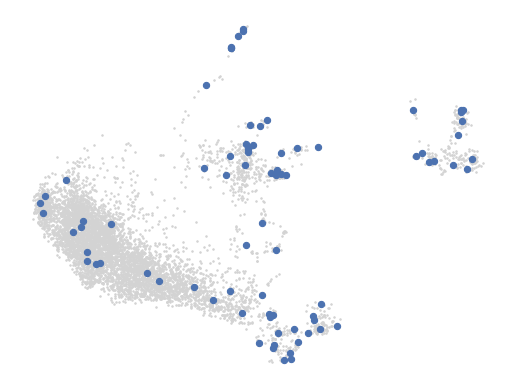

Randomly initialized A matrix.
Setting convergence threshold at 0.00148
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Starting iteration 20.
Completed iteration 20.
Converged after 28 iterations.


findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

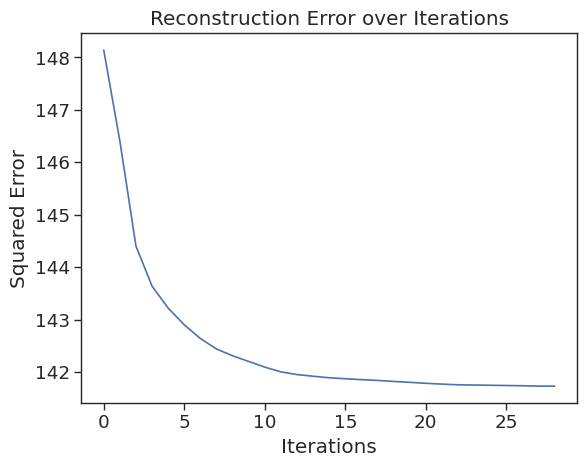

Welcome to SEACells!
Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


  0%|          | 0/5766 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/5766 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/5766 [00:00<?, ?it/s]

Constructing CSR matrix...
Building kernel on X_scVI
Computing diffusion components from X_scVI for waypoint initialization ... 
Determing nearest neighbor graph...
Done.
Sampling waypoints ...
Done.
Selecting 66 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 89.76it/s]


Selecting 14 cells from greedy initialization.


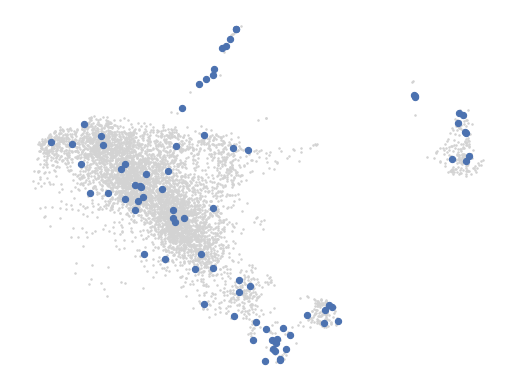

Randomly initialized A matrix.
Setting convergence threshold at 0.00140
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Starting iteration 20.
Completed iteration 20.
Starting iteration 30.
Completed iteration 30.
Converged after 37 iterations.


findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

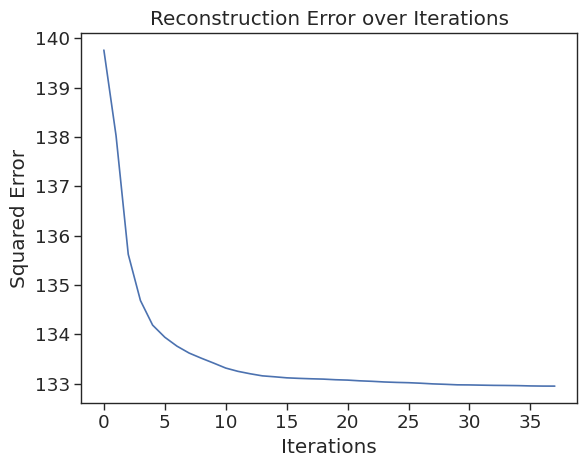

Welcome to SEACells!
Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


  0%|          | 0/6733 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/6733 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/6733 [00:00<?, ?it/s]

Constructing CSR matrix...
Building kernel on X_scVI
Computing diffusion components from X_scVI for waypoint initialization ... 
Determing nearest neighbor graph...
Done.
Sampling waypoints ...
Done.
Selecting 70 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 80.90it/s]


Selecting 10 cells from greedy initialization.


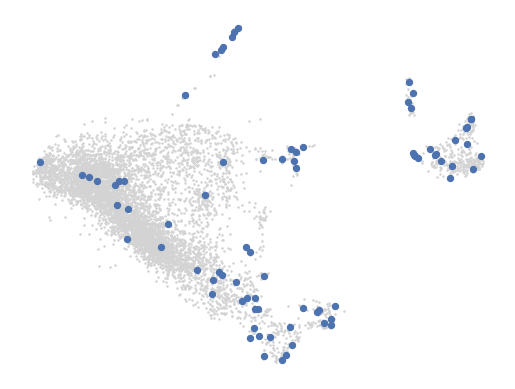

Randomly initialized A matrix.
Setting convergence threshold at 0.00151
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Starting iteration 20.
Completed iteration 20.
Starting iteration 30.
Completed iteration 30.
Starting iteration 40.
Completed iteration 40.
Converged after 48 iterations.


findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

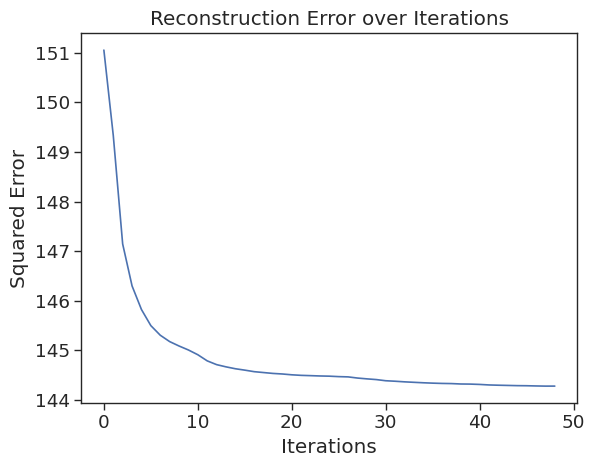

Welcome to SEACells!
Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


  0%|          | 0/5383 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/5383 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/5383 [00:00<?, ?it/s]

Constructing CSR matrix...
Building kernel on X_scVI
Computing diffusion components from X_scVI for waypoint initialization ... 
Determing nearest neighbor graph...
Done.
Sampling waypoints ...
Done.
Selecting 70 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 109.85it/s]

Selecting 10 cells from greedy initialization.


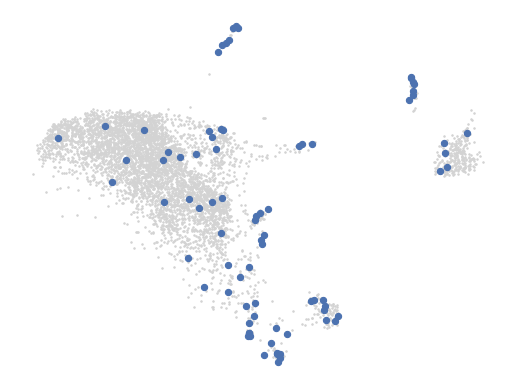

Randomly initialized A matrix.
Setting convergence threshold at 0.00135
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Starting iteration 20.
Completed iteration 20.
Starting iteration 30.
Completed iteration 30.


findfont: Font family 'Bitstream Vera Sans' not found.


Converged after 32 iterations.


findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

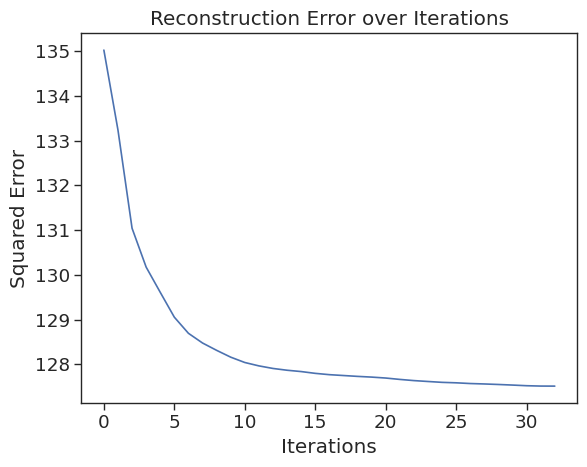

In [21]:
adata_copy = adata.copy()
#SEACells_adatas = []

for sample_id in adata.obs['Id'].unique():
    
    adata_sub = adata[(adata.obs['Id'] == sample_id) & (adata.obs['229E'] == False)].copy() 
    adata_sub.obsm['X_scVI'] = adata.obsm['X_scVI'][(adata.obs['Id'] == sample_id) & (adata.obs['229E'] == False)]

    model = SEACells.core.SEACells(adata_sub, 
                  build_kernel_on='X_scVI', 
                  n_SEACells=n_SEACells, 
                  n_waypoint_eigs=n_waypoint_eigs,
                  convergence_epsilon = 1e-5)
    model.construct_kernel_matrix()

    model.initialize_archetypes()
    SEACells.plot.plot_initialization(adata_sub, model)
    model.fit(min_iter=10, max_iter=50)
    model.plot_convergence()
    adata_copy.obs.loc[(adata.obs['Id'] == sample_id) & (adata.obs['229E'] == False), 'SEACell'] = [f"{cell}_{sample_id}_NEG" for cell in adata_sub.obs['SEACell'].values]
    #SEACell_ad = SEACells.core.summarize_by_SEACell(adata_sub, SEACells_label='SEACell', summarize_layer='raw_test')
    #print(SEACell_ad)
    #SEACells_adatas += [SEACell_ad]
    
adata = adata_copy

In [22]:
adata.obs

,Sample,dpi,Id,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,...,ref_model_celltypist1_label,ref_model_celltypist1_score,ref_model_celltypist2_label,ref_model_celltypist2_score,_scvi_batch,_scvi_labels,overcluster,229E,CellType_assignated,SEACell
AAACAAGCAAGAACAAAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4997,4997,8.516793,15760.0,9.665294,16.935279,0.0,...,Goblet (nasal),0.319114,Secretory_Goblet,0.999951,0,0,14,True,Superbasal,Unk
AAACAAGCACACTAAGAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4357,4357,8.379769,14550.0,9.585415,26.054983,0.0,...,Goblet (nasal),0.951831,Secretory_Goblet,0.999886,0,0,4,False,Club cells,SEACell-41_Inf_J3_NEG
AAACAAGCACCGTTTGAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,6425,6425,8.768108,37675.0,10.536778,39.777040,0.0,...,Goblet (nasal),0.824988,Secretory_Goblet,0.999993,0,0,38,False,Club cells,SEACell-45_Inf_J3_NEG
AAACAAGCACTTCGATAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4802,4802,8.476996,12024.0,9.394743,9.971723,0.0,...,Goblet (nasal),0.357202,Secretory_Goblet,0.999483,0,0,17,False,Goblet cells,SEACell-56_Inf_J3_NEG
AAACAAGCATGGTCAAAGTAGGCT-1-Inf_J3,Inf,J3,Inf_J3,4699,4699,8.455318,15655.0,9.658609,23.027787,0.0,...,Goblet (nasal),0.602141,Secretory_Goblet,0.999654,0,0,32,False,Goblet cells,SEACell-23_Inf_J3_NEG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGACGTATCCGCAAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,5428,5428,8.599510,17390.0,9.763708,15.043128,0.0,...,Goblet (nasal),0.055499,Secretory_Goblet,0.987707,0,0,9,False,Superbasal,SEACell-15_Mock_J6_NEG
TTTGGACGTCCTCACTAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,6077,6077,8.712431,21812.0,9.990261,18.732808,0.0,...,Goblet (nasal),0.080242,Secretory_Goblet,0.998898,0,0,18,False,Club cells,SEACell-10_Mock_J6_NEG
TTTGGACGTCCTTCTAAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,5301,5301,8.575839,15610.0,9.655731,11.249199,0.0,...,Goblet (nasal),0.997562,Secretory_Goblet,1.000000,0,0,40,False,Superbasal,SEACell-44_Mock_J6_NEG
TTTGGACGTGTGATGAAACGGGAA-1-Mock_J6,Mock,J6,Mock_J6,5857,5857,8.675564,24456.0,10.104671,26.255316,0.0,...,Goblet (nasal),0.996979,Secretory_Goblet,0.999873,0,0,12,False,Club cells,SEACell-37_Mock_J6_NEG


In [23]:
print(len(adata.obs['SEACell'].unique()))

321


In [78]:
metacell_dict = {}  # dictionary of metacells
n_SEACells_GFPpos  = 15    # number of meta cells per Id 
n_waypoint_eigs = 10

Welcome to SEACells!
Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


  0%|          | 0/611 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/611 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/611 [00:00<?, ?it/s]

Constructing CSR matrix...
Building kernel on X_scVI
Computing diffusion components from X_scVI for waypoint initialization ... 
Determing nearest neighbor graph...
Done.
Sampling waypoints ...
Done.
Selecting 9 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|█████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 618.73it/s]

Selecting 6 cells from greedy initialization.


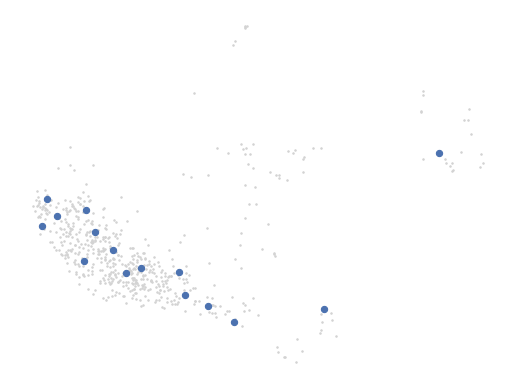

Randomly initialized A matrix.
Setting convergence threshold at 0.00043
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Starting iteration 20.
Completed iteration 20.


findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.


Starting iteration 30.
Completed iteration 30.
Converged after 30 iterations.


findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

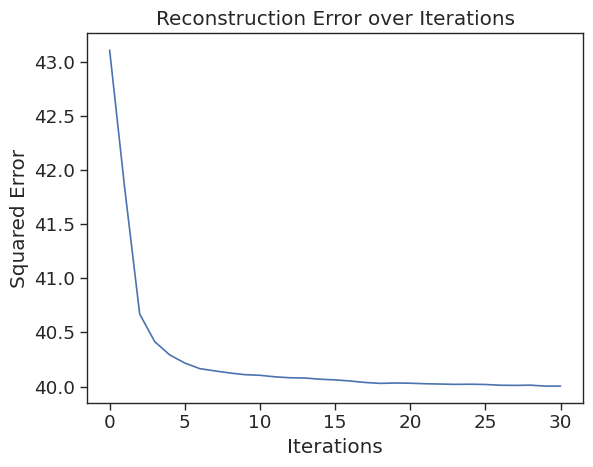

Welcome to SEACells!
Computing kNN graph using scanpy NN ...
Computing radius for adaptive bandwidth kernel...


  0%|          | 0/241 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/241 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/241 [00:00<?, ?it/s]

Constructing CSR matrix...
Building kernel on X_scVI
Computing diffusion components from X_scVI for waypoint initialization ... 
Determing nearest neighbor graph...
Done.
Sampling waypoints ...
Done.
Selecting 8 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|█████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 548.40it/s]

Selecting 7 cells from greedy initialization.


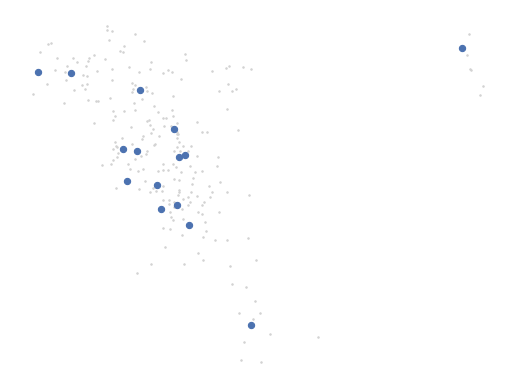

Randomly initialized A matrix.
Setting convergence threshold at 0.00024
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Starting iteration 20.
Completed iteration 20.
Starting iteration 30.
Completed iteration 30.
Starting iteration 40.
Completed iteration 40.


findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.


Starting iteration 50.
Completed iteration 50.
Converged after 51 iterations.


findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

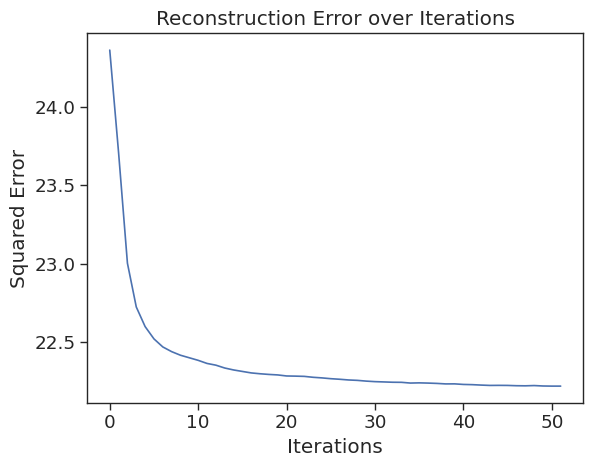

In [79]:
#for the GFP-POS cells
adata_copy = adata.copy()

for dpi in adata.obs['dpi'].unique():
    
    adata_sub = adata[(adata.obs['Sample'] == 'Inf') & (adata.obs['229E'] == True) & (adata.obs['dpi'] == dpi)].copy() 
    adata_sub.obsm['X_scVI'] = adata.obsm['X_scVI'][(adata.obs['Sample'] == 'Inf') & (adata.obs['229E'] == True) & (adata.obs['dpi'] == dpi)]

    model = SEACells.core.SEACells(adata_sub, 
                  build_kernel_on='X_scVI', 
                  n_SEACells=n_SEACells_GFPpos, 
                  n_waypoint_eigs=n_waypoint_eigs,
                  convergence_epsilon = 1e-5)
    model.construct_kernel_matrix()

    model.initialize_archetypes()
    SEACells.plot.plot_initialization(adata_sub, model)
    model.fit(min_iter=10, max_iter=70)
    model.plot_convergence()
    adata_copy.obs.loc[(adata.obs['Sample'] == 'Inf') & (adata.obs['229E'] == True) & (adata.obs['dpi'] == dpi), 'SEACell'] = [f"{cell}_Inf_{dpi}_POS" for cell in adata_sub.obs['SEACell'].values]

    
adata = adata_copy

In [80]:
os.makedirs('G:/Data processing pipeline 0.1 Yohan/scRNA/Output/metacell_data_Xtrain_GFPNEG', exist_ok = True)

In [81]:
adata.write_h5ad('G:/Data processing pipeline 0.1 Yohan/scRNA/Output/metacell_data_Xtrain_GFPNEG' + '/metacell_data_Xtrain.h5ad')

In [82]:
adata = sc.read('G:/Data processing pipeline 0.1 Yohan/scRNA/Output/metacell_data_Xtrain_GFPNEG/metacell_data_Xtrain.h5ad')

In [6]:
adata

AnnData object with n_obs × n_vars = 25300 × 13893
    obs: 'Sample', 'dpi', 'Id', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet_score_scDbFinder', 'doublet_class_scDbFinder', 'doublet_dbd', 'doublet_score_dbd', 'cell_type', 'Batch', 'predicted', 'transfer_score', 'ref_model_celltypist1_label', 'ref_model_celltypist1_score', 'ref_model_celltypist2_label', 'ref_model_celltypist2_score', '_scvi_batch', '_scvi_labels', 'overcluster', '229E', 'CellType_assignated', 'SEACell'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'CellType_assignated_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_overcluster', 'neighbors', 'overcluster', 'overcluster_colors', 'pca', 'predicted_colors', 'rank

# Agregation and sum of counts based of the meta cells using X_test

In [30]:
SEACell_ad = SEACells.core.summarize_by_SEACell(adata, SEACells_label='SEACell', summarize_layer='raw_test')
SEACell_ad

100%|███████████████████████████████████████████████████████████████████████████████| 351/351 [00:02<00:00, 120.60it/s]


AnnData object with n_obs × n_vars = 351 × 13893
    layers: 'raw'

C:\Users\test\anaconda3\envs\seacells\lib\site-packages\seaborn\relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
C:\Users\test\anaconda3\envs\seacells\lib\site-packages\seaborn\relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bit

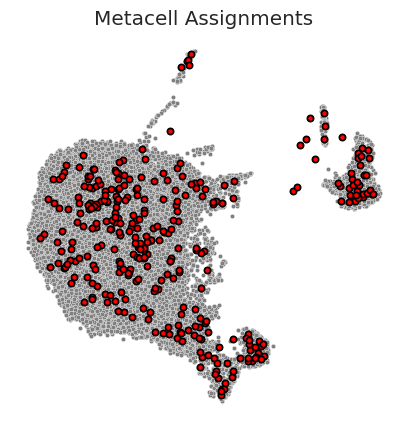

In [35]:
SEACells.plot.plot_2D(adata, key='X_umap', colour_metacells=False)

C:\Users\test\anaconda3\envs\seacells\lib\site-packages\seaborn\relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
C:\Users\test\anaconda3\envs\seacells\lib\site-packages\seaborn\relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bit

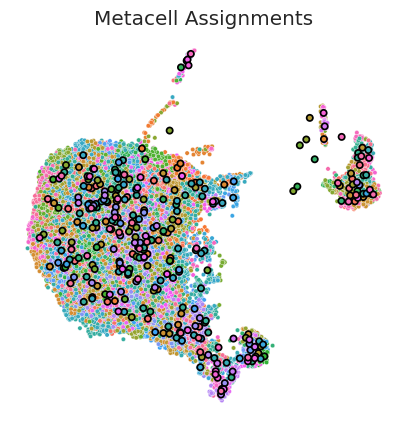

In [37]:
SEACells.plot.plot_2D(adata, key='X_umap', colour_metacells=True)

C:\Users\test\anaconda3\envs\seacells\lib\site-packages\seacells-0.3.3-py3.8.egg\SEACells\plot.py:130: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(label_df.groupby("SEACell").count().iloc[:, 0], bins=bins)
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.


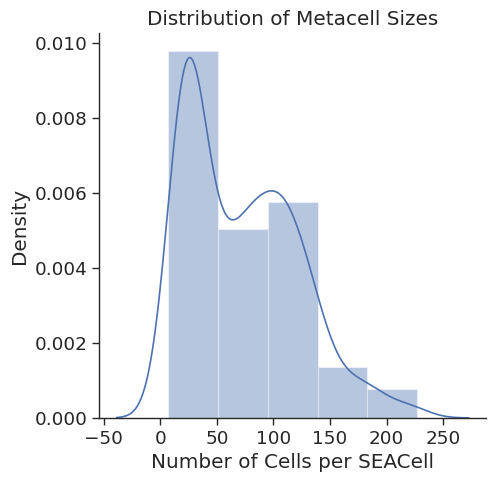

,size
SEACell,
SEACell-0_Inf_J3_NEG,85
SEACell-0_Inf_J3_POS,30
SEACell-0_Inf_J6_NEG,90
SEACell-0_Inf_J6_POS,16
SEACell-0_Mock_J3_NEG,56
...,...
SEACell-79_Inf_J3_NEG,144
SEACell-79_Inf_J6_NEG,75
SEACell-79_Mock_J3_NEG,25


In [31]:
SEACells.plot.plot_SEACell_sizes(adata, bins=5)

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

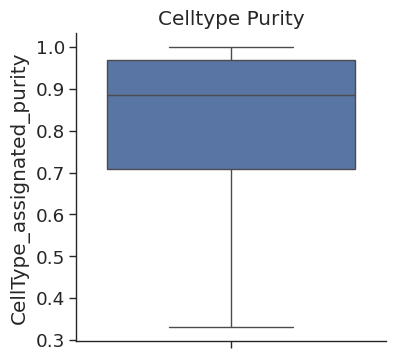

,CellType_assignated,CellType_assignated_purity
SEACell,,
SEACell-0_Inf_J3_NEG,Club cells,0.811765
SEACell-0_Inf_J3_POS,Club cells,0.800000
SEACell-0_Inf_J6_NEG,Superbasal,0.611111
SEACell-0_Inf_J6_POS,Superbasal,0.875000
SEACell-0_Mock_J3_NEG,Superbasal,0.892857


In [32]:
SEACell_purity = SEACells.evaluate.compute_celltype_purity(adata, 'CellType_assignated')

plt.figure(figsize=(4,4))
sns.boxplot(data=SEACell_purity, y='CellType_assignated_purity')
plt.title('Celltype Purity')
sns.despine()
plt.show()
plt.close()

SEACell_purity.head()

In [33]:
SEACell_purity[SEACell_purity['CellType_assignated_purity']>0.7]

,CellType_assignated,CellType_assignated_purity
SEACell,,
SEACell-0_Inf_J3_NEG,Club cells,0.811765
SEACell-0_Inf_J3_POS,Club cells,0.800000
SEACell-0_Inf_J6_POS,Superbasal,0.875000
SEACell-0_Mock_J3_NEG,Superbasal,0.892857
SEACell-0_Mock_J6_NEG,Superbasal,1.000000
...,...,...
SEACell-78_Inf_J6_NEG,Ciliated cells,1.000000
SEACell-78_Mock_J3_NEG,Basal cells,1.000000
SEACell-79_Inf_J3_NEG,Goblet cells,0.923611


Determing nearest neighbor graph...


findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

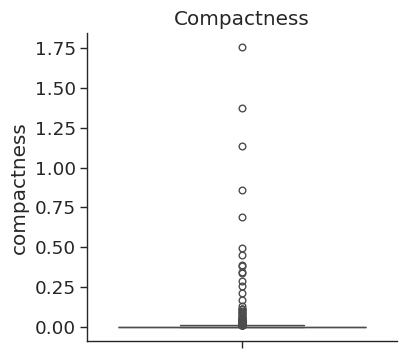

,compactness
SEACell,
SEACell-0_Inf_J3_NEG,0.000015
SEACell-0_Inf_J3_POS,0.000010
SEACell-0_Inf_J6_NEG,0.001844
SEACell-0_Inf_J6_POS,0.012667
SEACell-0_Mock_J3_NEG,0.007526


In [34]:
compactness = SEACells.evaluate.compactness(adata, 'X_scVI')

plt.figure(figsize=(4,4))
sns.boxplot(data=compactness, y='compactness')
plt.title('Compactness')
sns.despine()
plt.show()
plt.close()

compactness.head()

Determing nearest neighbor graph...


findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

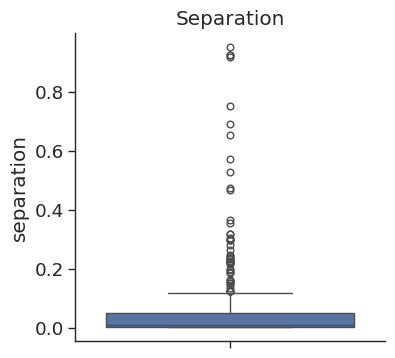

,separation
SEACell,
SEACell-0_Inf_J3_NEG,0.003623
SEACell-0_Inf_J3_POS,0.001794
SEACell-0_Inf_J6_NEG,0.017089
SEACell-0_Inf_J6_POS,0.045948
SEACell-0_Mock_J3_NEG,0.047200


In [35]:
separation = SEACells.evaluate.separation(adata, 'X_scVI',nth_nbr=1)

plt.figure(figsize=(4,4))
sns.boxplot(data=separation, y='separation')
plt.title('Separation')
sns.despine()
plt.show()
plt.close()

separation.head()

In [67]:
SEACell_ad.obs

""
SEACell-66_Inf_J3
SEACell-28_Inf_J3
SEACell-31_Inf_J3
SEACell-38_Inf_J3
SEACell-3_Inf_J3
...
SEACell-2_Mock_J6
SEACell-61_Mock_J6
SEACell-69_Mock_J6
SEACell-55_Mock_J6


In [36]:
os.makedirs('G:/Data processing pipeline 0.1 Yohan/scRNA/Output/SEACell_matrix_GFP', exist_ok = True)

In [37]:
SEACell_ad.write_h5ad('G:/Data processing pipeline 0.1 Yohan/scRNA/Output/SEACell_matrix_GFP' + '/SEACell_matrix.h5ad')

In [38]:
SEACell_ad = sc.read('G:/Data processing pipeline 0.1 Yohan/scRNA/Output/SEACell_matrix_GFP/SEACell_matrix.h5ad')

In [39]:
SEACell_ad

AnnData object with n_obs × n_vars = 351 × 13893
    layers: 'raw'

In [40]:
SEACell_ad.obs['Purity'] = SEACell_purity['CellType_assignated_purity']

In [41]:
SEACell_ad.obs['Cell_type'] = SEACell_purity['CellType_assignated']

In [42]:
SEACell_ad.obs['Compactness'] = compactness['compactness']

In [43]:
SEACell_ad.obs['separation'] = separation['separation']

In [44]:
SEACell_ad.obs

,Purity,Cell_type,Compactness,separation
SEACell-3_Inf_J3_POS,0.673913,Goblet cells,0.000059,0.004392
SEACell-41_Inf_J3_NEG,0.938053,Club cells,0.000102,0.006673
SEACell-45_Inf_J3_NEG,0.865385,Club cells,0.000106,0.002988
SEACell-56_Inf_J3_NEG,0.629310,Club cells,0.000107,0.006870
SEACell-23_Inf_J3_NEG,0.908333,Goblet cells,0.000115,0.005121
...,...,...,...,...
SEACell-26_Mock_J6_NEG,0.666667,Undetermined serous cells,0.000083,0.018397
SEACell-54_Mock_J6_NEG,0.868852,Superbasal,0.000029,0.003984
SEACell-70_Mock_J6_NEG,1.000000,Basal cells,0.017228,0.038523
SEACell-73_Mock_J6_NEG,1.000000,Basal cells,0.000748,0.038880


In [45]:
SEACell_ad.obs['Cell_type'].unique()

array(['Goblet cells', 'Club cells', 'Ciliated cells', 'Superbasal',
       'Unk3', 'Basal cells', 'Undetermined serous cells', 'Unk2',
       'Ionocytes', 'Deuterosomal', 'Unk1'], dtype=object)

In [46]:
for _ in SEACell_ad.obs['Cell_type'].unique():
    mask = (SEACell_ad.obs['Cell_type'] == _)
    print(f'{_} : {sum(mask)}')

Goblet cells : 101
Club cells : 41
Ciliated cells : 43
Superbasal : 81
Unk3 : 2
Basal cells : 40
Undetermined serous cells : 22
Unk2 : 8
Ionocytes : 4
Deuterosomal : 2
Unk1 : 7


In [47]:
SEACell_ad.obs_names

Index(['SEACell-3_Inf_J3_POS', 'SEACell-41_Inf_J3_NEG',
       'SEACell-45_Inf_J3_NEG', 'SEACell-56_Inf_J3_NEG',
       'SEACell-23_Inf_J3_NEG', 'SEACell-66_Inf_J3_NEG',
       'SEACell-44_Inf_J3_NEG', 'SEACell-74_Inf_J3_NEG',
       'SEACell-1_Inf_J3_NEG', 'SEACell-8_Inf_J3_NEG',
       ...
       'SEACell-63_Mock_J6_NEG', 'SEACell-35_Mock_J6_NEG',
       'SEACell-33_Mock_J6_NEG', 'SEACell-69_Mock_J6_NEG',
       'SEACell-60_Mock_J6_NEG', 'SEACell-26_Mock_J6_NEG',
       'SEACell-54_Mock_J6_NEG', 'SEACell-70_Mock_J6_NEG',
       'SEACell-73_Mock_J6_NEG', 'SEACell-47_Mock_J6_NEG'],
      dtype='object', length=351)

In [48]:
SEACell_ad.obs['sample'] = SEACell_ad.obs_names.str.split('_').str[1]

In [49]:
SEACell_ad.obs['dpi'] = SEACell_ad.obs_names.str.split('_').str[2]

In [50]:
SEACell_ad.obs['229E'] = SEACell_ad.obs_names.str.split('_').str[3]

In [51]:
SEACell_ad.obs['Id'] = SEACell_ad.obs['sample'] + '_' + SEACell_ad.obs['dpi']

In [93]:
SEACell_ad.obs

,Purity,Cell_type,Compactness,separation,sample,dpi,229E,Id
SEACell-3_Inf_J3_POS,0.673913,Goblet cells,0.000059,0.004392,Inf,J3,POS,Inf_J3
SEACell-41_Inf_J3_NEG,0.938053,Club cells,0.000102,0.006673,Inf,J3,NEG,Inf_J3
SEACell-45_Inf_J3_NEG,0.865385,Club cells,0.000106,0.002988,Inf,J3,NEG,Inf_J3
SEACell-56_Inf_J3_NEG,0.629310,Club cells,0.000107,0.006870,Inf,J3,NEG,Inf_J3
SEACell-23_Inf_J3_NEG,0.908333,Goblet cells,0.000115,0.005121,Inf,J3,NEG,Inf_J3
...,...,...,...,...,...,...,...,...
SEACell-26_Mock_J6_NEG,0.666667,Undetermined serous cells,0.000083,0.018397,Mock,J6,NEG,Mock_J6
SEACell-54_Mock_J6_NEG,0.868852,Superbasal,0.000029,0.003984,Mock,J6,NEG,Mock_J6
SEACell-70_Mock_J6_NEG,1.000000,Basal cells,0.017228,0.038523,Mock,J6,NEG,Mock_J6
SEACell-73_Mock_J6_NEG,1.000000,Basal cells,0.000748,0.038880,Mock,J6,NEG,Mock_J6


In [55]:
results = []
for _ in SEACell_ad.obs['Cell_type'].unique():
    for i in SEACell_ad.obs['229E'].unique():
        mask = (SEACell_ad.obs['Cell_type'] == _)&(SEACell_ad.obs['229E'] == i)&(SEACell_ad.obs['sample'] == 'Inf')
        count = sum(mask)
        results.append({'Cell_type': _, '229E': i, 'Count': count})
df_results = pd.DataFrame(results)
df_pivot = df_results.pivot(index='Cell_type', columns='229E', values='Count')

In [56]:
df_pivot

229E,NaN,NEG,POS
Cell_type,,,
Basal cells,0,19,1
Ciliated cells,0,19,2
Club cells,0,21,6
Deuterosomal,0,1,0
Goblet cells,0,46,14
Ionocytes,0,2,0
Superbasal,0,34,6
Undetermined serous cells,0,11,1
Unk1,0,0,0


In [101]:
results = []
for _ in SEACell_ad.obs['Cell_type'].unique():
    for i in SEACell_ad.obs['229E'].unique():
        mask = (SEACell_ad.obs['Cell_type'] == _)&(SEACell_ad.obs['229E'] == i)&(SEACell_ad.obs['sample'] == 'Inf')&(SEACell_ad.obs['Purity']>0.7)
        count = sum(mask)
        results.append({'Cell_type': _, '229E': i, 'Count': count})
df_results = pd.DataFrame(results)
df_pivot = df_results.pivot(index='Cell_type', columns='229E', values='Count')
df_pivot[''] = df_pivot.sum(axis=1)

df_pivot.loc[''] = df_pivot.sum()

In [102]:
df_pivot

229E,NaN,NEG,POS,
Cell_type,,,,
Basal cells,0,19,0,19
Ciliated cells,0,19,2,21
Club cells,0,17,3,20
Deuterosomal,0,0,0,0
Goblet cells,0,31,3,34
Ionocytes,0,2,0,2
Superbasal,0,28,4,32
Undetermined serous cells,0,8,0,8
Unk1,0,0,0,0


In [156]:
SEACell_ad.obs

,Purity,Cell_type,Compactness,separation,sample,dpi,Id
SEACell-66_Inf_J3,0.725610,Superbasal,0.000028,0.003656,Inf,J3,Inf_J3
SEACell-28_Inf_J3,0.699187,Club cells,0.000029,0.004791,Inf,J3,Inf_J3
SEACell-31_Inf_J3,0.608696,Superbasal,0.010393,0.063823,Inf,J3,Inf_J3
SEACell-38_Inf_J3,0.658683,Superbasal,0.000770,0.010183,Inf,J3,Inf_J3
SEACell-3_Inf_J3,0.899441,Goblet cells,0.000093,0.005436,Inf,J3,Inf_J3
...,...,...,...,...,...,...,...
SEACell-2_Mock_J6,0.631579,Undetermined serous cells,0.000076,0.020001,Mock,J6,Mock_J6
SEACell-61_Mock_J6,1.000000,Basal cells,0.003590,0.041939,Mock,J6,Mock_J6
SEACell-69_Mock_J6,1.000000,Basal cells,0.009930,0.045673,Mock,J6,Mock_J6
SEACell-55_Mock_J6,1.000000,Basal cells,0.006964,0.045673,Mock,J6,Mock_J6


In [94]:
SEACell_ad

AnnData object with n_obs × n_vars = 351 × 13893
    obs: 'Purity', 'Cell_type', 'Compactness', 'separation', 'sample', 'dpi', '229E', 'Id'
    layers: 'raw'

In [95]:
os.makedirs('G:/Data processing pipeline 0.1 Yohan/scRNA/Output/ad_seacell_wlabels_GFP', exist_ok = True)

In [96]:
SEACell_ad.write_h5ad('G:/Data processing pipeline 0.1 Yohan/scRNA/Output/ad_seacell_wlabels_GFP' + '/ad_seacell_wlabels.h5ad')

AnnData object with n_obs × n_vars = 320 × 13893
    obs: 'Purity', 'Cell_type', 'Compactness', 'separation', 'sample', 'dpi', 'Id'
    var: 'n_cells'